In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Conor\Anaconda3\python.exe
3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Load Data

In [4]:
import os.path

file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_mie_corrected_new"))

In [5]:
# A
#Grade_dict = {"-": "0", "I": "1","IIa": "2","IIb": "2","IIIa": "3", "IIIb": "3"}

# B
Stage_dict = {"-": "0", "I": "1","IIa": "1","IIb": "2","IIIa": "2", "IIIb": "3"}

In [6]:
Stage_Q = Breast_DF.reset_index()["Stage"].map(Stage_dict)
Stage_Q.name = "Stage_Q"

Grade_Q = Breast_DF.reset_index()["Grade"].map({"-": 0, "1": 1,"2": 2,"2--3": 3,"3": 3})
Grade_Q.name = "Grade_Q"

Breast_DF.set_index(Stage_Q, append = True, inplace = True)
Breast_DF.set_index(Grade_Q, append = True, inplace = True)

import os.path

file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_data_raw"))

# Preprocessing

Remove blood and Necrosis from the dataset

In [138]:
indices = (Breast_DF.reset_index().Label != "Blood") & (Breast_DF.reset_index().Label != "Necrosis") & (Breast_DF.reset_index().Label != "Non_malignant Epithelium") & (Breast_DF.reset_index().Label != "Malignant Epithelium")

Breast_DF = Breast_DF[indices.values]#.head()

In [253]:
indices = (Breast_DF.reset_index().Label != "Blood") & (Breast_DF.reset_index().Label != "Necrosis") & ()
Breast_DF = Breast_DF[indices.values]#.head()

SyntaxError: invalid syntax (<ipython-input-253-b345c7d0fbab>, line 2)

In [7]:
indices = (Breast_DF.reset_index().Type == "Malignant") & (Breast_DF.reset_index().Grade == "-") 
Breast_DF = Breast_DF[indices.values == False]#.head()

drop any rows with stage 3

In [81]:
indices = (Breast_DF.reset_index().Grade != "3")
Breast_DF = Breast_DF[indices.values]#.head()

Preprocessing method, maybe make this all one pipe?

In [9]:
Breast_DF.head()

912   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.080876   
                                                                                        1        0.079898   
                                                                                        1        0.077629   
                                                                                        1        0.074053   
                                                                                        1        0.069825   

                                                                                                     916   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.083204   
                                                                                        1        0.083000   
                                                                                        1        0.080233   
                                                                                        1        0.077640   
                                                                                        1        0.073012   

                                                                                                     920   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.082033   
                                                                                        1        0.081252   
                                                                                        1        0.079619   
                                                                                        1        0.077728   
                                                                                        1        0.073911   

                                                                                                     924   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.081955   
                                                                                        1        0.081274   
                                                                                        1        0.079981   
                                                                                        1        0.078618   
                                                                                        1        0.076819   

                                                                                                     928   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.084811   
                                                                                        1        0.084227   
                                                                                        1        0.083234   
                                                                                        1        0.081632   
                                                                                        1        0.080346   

                                                                                                     932   \
Sex M Type      N T Grade Label Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Blood Invasive ductal carcinoma IIa  

In [8]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
import Tissue_Analysis_Tools as TAT

steps = [
         #("Normalise", Normalizer(norm = "l1"))
         ("RobustScaler", RobustScaler()),
         ("PCA_Denoise", TAT.denoise_PCA(n_components = 100)),
         ("StandardScale", StandardScaler())
        ]

pipe  = Pipeline(steps)

In [9]:
dataframe = TAT.process_data(Breast_DF, paraffin = (1340,1490))#, balance = "Type")

values = pipe.fit_transform(dataframe.values.T).T

Breast_DF_P = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

Processing


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


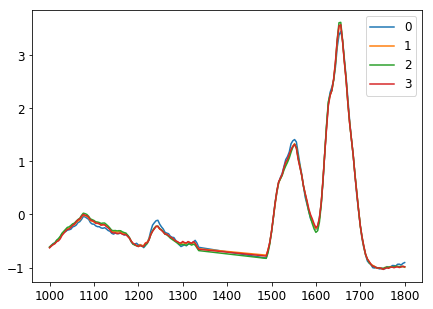

In [11]:
fig, ax = plt.subplots(figsize = (7,5))

for name, df in Breast_DF_P.groupby("Stage_Q"):
    
    ax.plot(df.mean(axis = 0, numeric_only = True), label = name)
    
ax.legend()
plt.show()    

In [297]:
index = Breast_DF_P.reset_index()["Grade"] == "-"

In [287]:
index = Breast_DF_P.reset_index()["Pathology"] == "Normal breast tissue (blood vessel and fibrofatty tissue)"

In [298]:
Breast_DF_P[index.values].reset_index()["Stage"].value_counts()

-    71147
Name: Stage, dtype: int64

# Analysis

# Dataset partitioning

In [10]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

lb = LabelBinarizer()

DATA = Breast_DF_P#.sample(10000)

DATA = DATA.sample(frac = 1) # Shuffle the dataframe randomly

y_label = "Stage_Q"

X = DATA
Y = DATA.reset_index()[y_label]

lb.fit(Y)

Y_b = pd.DataFrame(lb.transform(Y), index = Y.index)

# split set by patients
train_p, valid_p = train_test_split(np.unique(Breast_DF_P.reset_index()["Core"])
                                    , test_size = 0.1
                                    #, random_state = 42
                                    , shuffle = True)

# Keep a separate validation set aside 
#X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=42, shuffle = True)

# Training and validation sets on patient basis
X_train = X[X.reset_index()["Core"].isin(train_p).values]
X_valid = X[X.reset_index()["Core"].isin(valid_p).values]

y_train = X_train.reset_index()[y_label]
y_valid = X_valid.reset_index()[y_label]

#pd.DataFrame(X_valid.values, index = y_valid.values).round(6).to_csv(r"E:\Validation.csv".format(i+1), header = None)

print("Train set: \n", y_train.value_counts(), "\n")
print("Validation set: \n", y_valid.value_counts(), "\n")

# Create dataframes containing the binary labels for each class
y_train = pd.DataFrame(lb.transform(y_train), index = y_train.index)
y_valid = pd.DataFrame(lb.transform(y_valid), index = y_valid.index)

if len(np.unique(Y)) == 2: y_train[1] = y_train[0].map({0:1, 1:0})
if len(np.unique(Y)) == 2: y_valid[1] = y_valid[0].map({0:1, 1:0})

Train set: 
 1    176778
0     63304
2     43767
3     12555
Name: Stage_Q, dtype: int64 

Validation set: 
 1    9850
0    7843
2    2104
3    1847
Name: Stage_Q, dtype: int64 



In [11]:
index = X_train.reset_index()[y_label] == "3"
np.unique(X_train[index.values].reset_index()["Core"])

array(['C3', 'J11', 'K1'], dtype=object)

In [12]:
y_label

print("Validation set: \n")

for name in np.unique(X_valid.reset_index()[y_label]):
    print(name, "\n")
    index = X_valid.reset_index()[y_label] == X_valid.reset_index()[y_label].value_counts()[name]
    index = X_valid.reset_index()[y_label] == name

    print(X_valid[index.values].reset_index()["Core"].value_counts())

Validation set: 

0 

M15    7843
Name: Core, dtype: int64
1 

G5     4154
F12    3249
B15    1646
B7      801
Name: Core, dtype: int64
2 

F9    1588
J1     516
Name: Core, dtype: int64
3 

E5    1847
Name: Core, dtype: int64


In [320]:
y_label

print("Train set: \n")

for name in np.unique(X_train.reset_index()[y_label]):
    print(name, "\n")
    index = X_train.reset_index()[y_label] == X_train.reset_index()[y_label].value_counts()[name]
    index = X_train.reset_index()[y_label] == name

    print(X_train[index.values].reset_index()["Core"].value_counts())

Train set: 

0 

M15    7843
M4     6652
M9     6008
M16    5922
M1     5397
M3     5172
M7     4963
M11    4784
M10    4537
M2      313
Name: Core, dtype: int64
1 

J9     15704
A3     13722
K6     10663
D16     8989
F15     8188
B4      7575
L3      7317
J6      7294
A6      7084
J15     5602
B11     5433
J14     5432
E13     4949
A7      4425
B2      4214
G5      4154
B1      3615
K5      3600
J13     3578
B14     3541
K7      3373
A2      3337
D7      3328
D15     3258
F12     3249
A1      2906
B10     2496
E6      2403
D13     1859
B5      1823
A9      1816
A8      1739
B15     1646
K3      1598
A4      1498
F6      1448
A11     1381
B7       801
Name: Core, dtype: int64
2 

H3     12779
B6      9577
J5      4518
J4      3308
J7      2854
B16     2512
L1      1797
E3      1691
F9      1588
J16     1436
I4      1284
J1       516
D14      200
E16       64
Name: Core, dtype: int64
3 

J11    9402
K1     2459
E5     1847
Name: Core, dtype: int64


In [22]:
index = X_valid.reset_index().Stage == X_valid.reset_index().Stage.value_counts().idxmin()

print(len(X_valid[index.values].reset_index()["Core"].value_counts()))

1


# HyperOpt Training - XGBoost

In [15]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

This will ouput a score for the current hyperparameter configuration 

In [13]:
from sklearn.metrics import f1_score, confusion_matrix

def j_xg_bin(y_predicted, dtrain_true):
    
    y_true = dtrain_true.get_label().astype(int)
    bin_preds = [1 if pred >0.5 else 0 for pred in y_predicted]

    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
        
    return "J", 1-j # Return inverse as this score will be minimised

def j_normal_bin(y_true, y_pred):
    
    bin_preds = [1 if pred >0.5 else 0 for pred in y_pred]
    
    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
    
    return j

In [16]:
import xgboost as xgb

def hyper_opt_search_XGBoost(X, y, grouping, weight_binary = False
                             , optimiser = tpe.suggest, random_state = 42
                             , cores = 1, n_evals = 3, k_splits = 2):
    
    from sklearn.model_selection import train_test_split, GroupKFold
    from sklearn.metrics import roc_auc_score
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def score(params):
        
        loss_cv = []
        scores = []
        
        i = 0
        
        for train_index, test_index in GroupKFold(k_splits).split(X, y, grouping):
            
            # Uncomment to save folds
            #X_Data = np.vstack([X[train_index], X[test_index]])
            #Y_Data = lb.inverse_transform(np.hstack([y[train_index], y[test_index]]))
            #pd.DataFrame(X_Data, index=Y_Data).round(6).to_csv(r"F:\fold_{}.csv".format(i+1), header = None)
            
            #print(np.unique(y[train_index]))
            #print(np.unique(y[test_index]))
            
            dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
            dtest = xgb.DMatrix(X[test_index], label=y[test_index])

            watchlist = [(dtest, 'eval'), (dtrain, 'train')]

            xgb_cl = xgb.train(params, dtrain, evals=watchlist, verbose_eval=False)#, feval=j_xg_bin)

            predictions = xgb_cl.predict(dtest, ntree_limit = xgb_cl.best_iteration + 1)

            # TODO: try and get the y_labels from dtest
            score = roc_auc_score(y[test_index], predictions)
            #score = j_normal_bin(y[test_index], predictions)
            scores.append(score)
            
            loss = 1 - score
            
            loss_cv.append(loss)
            
        #print("\tScore {0}\n\n".format(1-loss))
        return {'loss': loss.mean(), 'status': STATUS_OK, 'scores': scores}
    
    space = {
        "colsample_bylevel" : hp.quniform('colsample_bylevel', 0.1,1,0.05),
        "n_classes" : 2,
        "scale_pos_weight" : 1/(np.sum(y)/y.shape[0]),
        'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.7, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(3, 15, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 8, 1),
        'subsample': hp.quniform('subsample', 0.3, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.3, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 0.95, 0.05),
        'eval_metric': 'auc',
        #'eval_metric': j_xg_bin,
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': cores,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state      
    }

    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=n_evals)
    
    best["scale_pos_weight"] = space["scale_pos_weight"]
    best["n_estimators"] = int(best["n_estimators"])

    return best

from sklearn.model_selection import KFold

grouping = X_train.reset_index()["Core"]

indices = []

i = 0

for train_index, test_index in KFold(5).split(grouping):
    
    indices.append(train_index)

    # Uncomment to save folds
    X_Data = np.vstack(X_train.values[test_index])
    Y_Data = lb.inverse_transform(np.hstack(y_train[0][test_index]))
    output = pd.DataFrame(X_Data, index=Y_Data)
    output.round(6).to_csv(r"F:\fold_{}.csv".format(i+1), header = None)
    
    print(output.index.value_counts())

    i = i+1

In [197]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = DATA.reset_index()["N"]

lda = LinearDiscriminantAnalysis(n_components = 2).fit_transform(DATA.values, y)

C:\Users\Conor\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


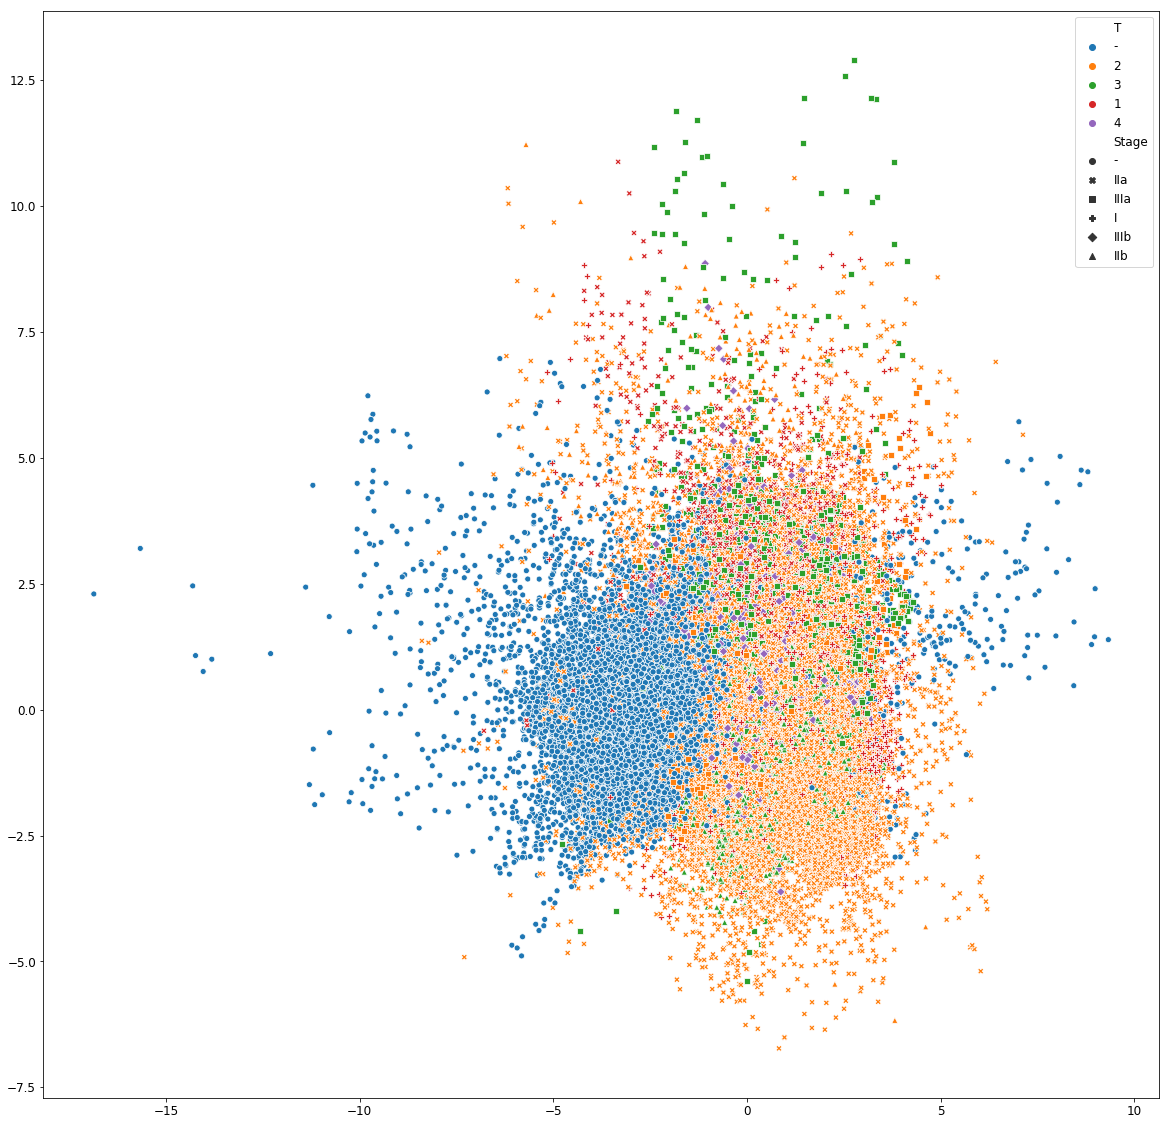

In [198]:
import seaborn as sns
fig, axes = plt.subplots(figsize = (20,20))

sns.scatterplot(x = lda[:,0], y = lda[:,1], hue = DATA.reset_index()["T"], ax = axes, style = DATA.reset_index()["Stage"], alpha = 1)

In [ ]:
%time
from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut

xgbinary_classifiers = dict()

for i, name in enumerate(np.unique(Y)):
    
    print("\n{}: {}".format(i + 1, name))
    
    best_hyperparams = hyper_opt_search_XGBoost(X_train.values,
                                        y_train[i].values,
                                        X_train.reset_index()["Core"],
                                        weight_binary = True,
                                        optimiser = tpe.suggest,
                                        random_state = 42,
                                        cores = -1,
                                        n_evals = 20,
                                        k_splits = 2)
                                #, trials = Trials())
    
    ## TODO: append best classifier to dictionary, store any other
    ## relevant variables with it using trials.
    clf_xgb = xgb.XGBClassifier(n_jobs = -1)
    
    # Set the parameters which are best for that particular class
    clf_xgb.set_params(**best_hyperparams)
    clf_xgb.fit(X_train.values, y_train[i])

    xgbinary_classifiers[name] = clf_xgb

Wall time: 0 ns

1: 0
100%|███████████████████████████████████████████████████| 20/20 [10:34<00:00, 23.11s/it, best loss: 0.0768500548447113]

2: 1
 40%|████████████████████▊                               | 8/20 [05:10<07:35, 37.99s/it, best loss: 0.3422431684357532]

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

In [ ]:
def bin_predict(x_array, classifiers):
    
    content = {name: classifier.predict_proba(x_array)[:,1] for name, classifier in classifiers.items()}
    output = pd.DataFrame(content)
    
    # Normalise probability
    output = output.div(output.sum(axis = 1), axis = 0)

    return output

# Results

In [ ]:
probs = bin_predict(X_valid.values, xgbinary_classifiers)

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(probs.columns)}, name = "AUC")

results_xgb = pd.DataFrame(sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [ ]:
import datetime, os

d = datetime.datetime.now().strftime("%d_%m_%Y_%H.%M")

save_place = r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Results"
results_xgb.to_csv(os.path.join(save_place, "XGBoost_{}_StageB.csv".format(d)))

In [ ]:
results_xgb

In [235]:
from sklearn.metrics import confusion_matrix

def sens_spec_etc(y_true, y_pred):
    
    #assert len(np.unique(y_true)) == len(np.unique(y_pred)), "True and predicted labels have different classes present"

    output = dict()
    
    for i, name in enumerate(np.unique(y_true)):
        
        stats = dict()
        #todo add assert statement to ensure at least 1 example of each class
        
        conf_mat = confusion_matrix(y_true, y_pred)

        stats["TP"] = conf_mat[i,i].round(2)
        stats["FP"] = np.sum(conf_mat[:,i]) - stats["TP"]
        stats["FN"] = np.sum(conf_mat[i,:]) - stats["TP"]
        stats["TN"] = np.sum(conf_mat) - stats["TP"] - stats["FP"] - stats["FN"]
        
        stats["Sensitivity"] = stats["TP"]/(stats["TP"] + stats["FN"])
        stats["Specficity"] = stats["TN"]/(stats["TN"] + stats["FP"])
        stats["F1"] = 2*stats["TP"]/(2*stats["TP"] + stats["FN"] + stats["FP"])
        stats["J"] = stats["Sensitivity"] + stats["Specficity"] - 1
        
        output[name] = stats
        
    return pd.DataFrame(output)

In [332]:
import itertools

def conf_mat_analyse(conf_mat, column_title, labels):
    
    stats = dict()
    stats = []
    
    n_classes = conf_mat.shape[0]
    
    for i, name in enumerate(labels):
        #todo add assert statement to ensure at least 1 example of each class

        TP = conf_mat[i,i]
        FP = np.sum(conf_mat[:,i]) - TP
        FN = np.sum(conf_mat[i,:]) - TP
        TN = np.sum(conf_mat) - TP - FP - FN

        stats.append([name,TP,TN,FP,FN])
        
    df = pd.DataFrame(stats, columns = [column_title,"TP","TN","FP","FN"])
    
    df["Acc"] = df.apply(lambda row: (row["TP"] + row["TN"])/(row["TP"] + row["TN"] + row["FP"] + row["FN"])*100, axis = 1)

    try: df["Sens"] = df.apply(lambda row: row["TP"]/(row["TP"] + row["FN"])*100, axis = 1)
        
    except: df["Sens"] = np.nan # Outputs NaN where there are no positive cases
        
    df["Spec"] = df.apply(lambda row: row["TN"]/(row["TN"] + row["FP"])*100, axis = 1)
    
    return df

In [83]:
lb.inverse_transform(y_valid.values)

array(['Non_malignant Epithelium', 'Malignant Epithelium',
       'Malignant Epithelium', ..., 'Malignant Epithelium',
       'Malignant Stroma', 'Malignant Stroma'], dtype='<U24')

In [ ]:
results

In [117]:
import matplotlib as mpl

print(mpl.get_configdir())
plt.style.reload_library()
plt.style.use('ScanCan_Style')

C:\Users\Conor\.matplotlib


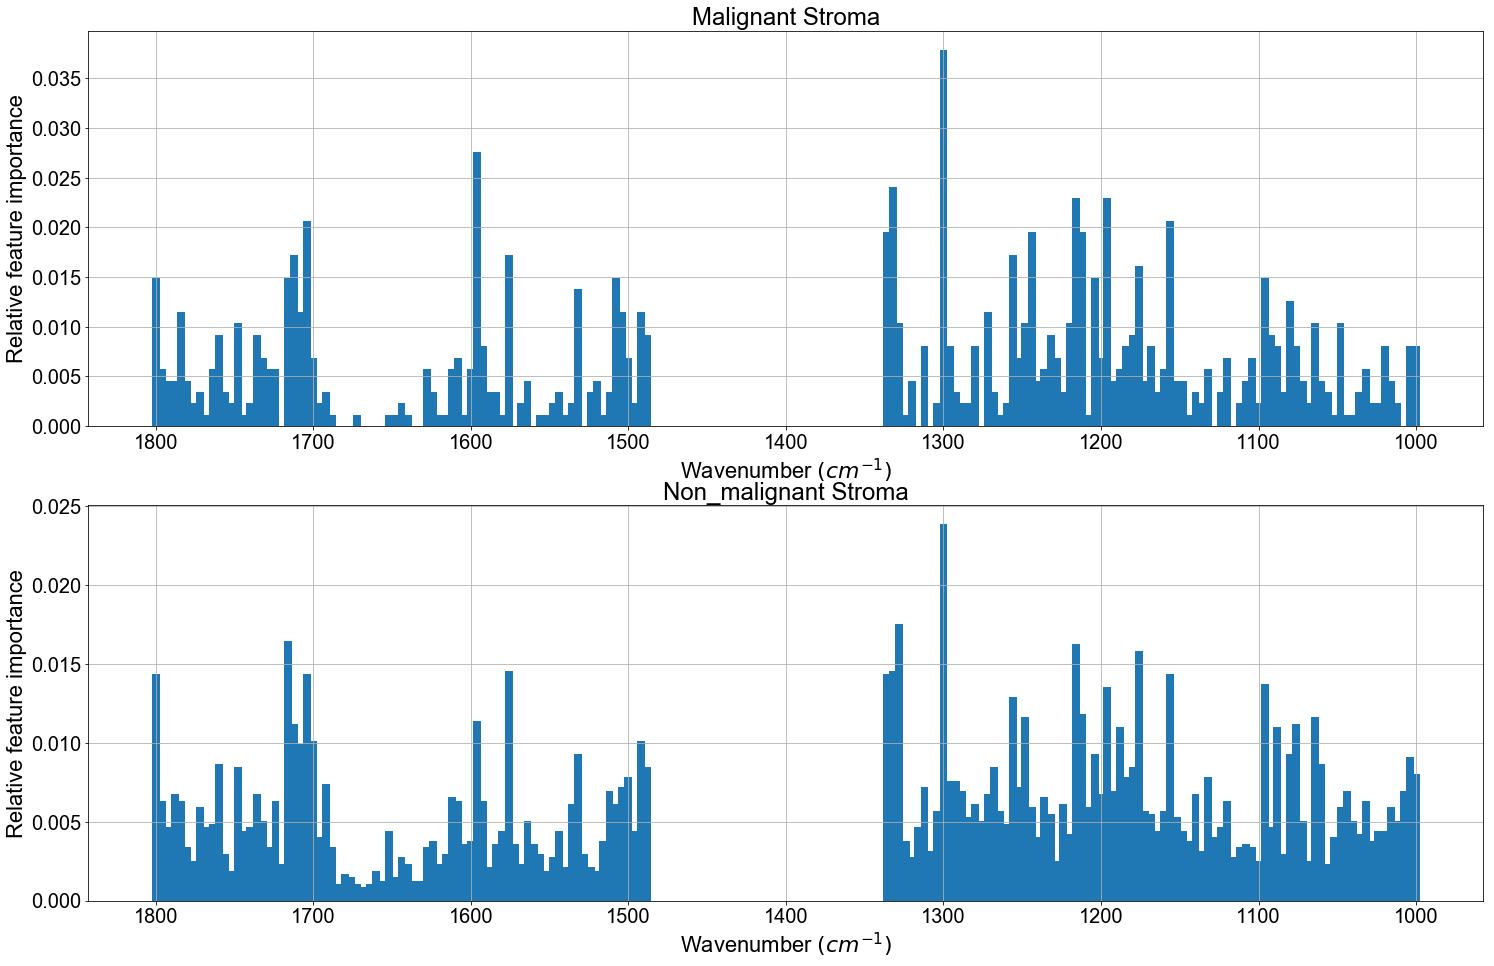

In [196]:
fig, axes = plt.subplots(nrows = len(xgbinary_classifiers), ncols = 1, figsize = (25,len(xgbinary_classifiers)*8))

#fig.suptitle("Relative wavenumber importances", fontsize = 16)

for title, plot, ax in zip(xgbinary_classifiers.keys(), xgbinary_classifiers.values(), axes.flatten()):
    
    ax.grid()
    ax.bar(X.columns, plot.feature_importances_, width = 5)
    #ax.set_xlim(min(X.columns), max(X.columns))
    ax.set_title(title)
    ax.invert_xaxis()
    ax.set_xlabel("Wavenumber $(cm^{-1})$")
    ax.set_ylabel("Relative feature importance")
    
plt.show()
fig.savefig(r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Feature_Importances_XGBoost.svg"
           ,format = "svg"
           ,bbox_inches = "tight")

# Hyperopt on other classifiers

In [198]:
def hyper_opt_search(clf, space, X, y, grouping, optimiser = tpe.suggest, random_state = 42, cores = 2, n_evals = 3):

    from sklearn.model_selection import train_test_split, GroupKFold
    from sklearn.metrics import roc_auc_score, confusion_matrix
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def score(params):
        
        loss_cv = []
        
        for train_index, test_index in GroupKFold(3).split(X, y, grouping):

            X_train, Y_train = X[train_index], y[train_index]
            X_test, Y_test = X[test_index], y[test_index]
            
            clf.fit(X_train, Y_train)

            predictions = clf.predict_proba(X_test)
            
            #score = roc_auc_score(y[test_index], predictions[:,1])
            score = j_normal(y[test_index], predictions[:,1])

            loss = 1 - score
            
            loss_cv.append(loss)
            
        #print("\tScore {0}\n\n".format(1-loss))
        return {'loss': loss.mean(), 'status': STATUS_OK}
    
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=n_evals)
    return best

In [248]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = {
    "SVM": (SVC(probability = True, kernel = "linear", class_weight = "balanced", gamma = "auto"), 
            {'C': hp.loguniform("C", np.log(1e-5), np.log(1e5))
            })
    
    ,"KNN": (KNeighborsClassifier(),
            {'n_neighbors': hp.choice('n_neighbors', np.arange(2, 30, dtype=int))
            ,'leaf_size': hp.choice('leaf_size', np.arange(10,60, dtype = int))
            ,'n_jobs': -1})
    
    ,"RF": (RandomForestClassifier(),
            {'n_estimators ': hp.choice('n_estimators', np.arange(10,1000,5))
            ,'max_depth': hp.choice('max_depth', np.arange(2,30,1))
            ,'min_samples_split': hp.quniform('min_samples_split', 0.3, 1, 0.05)})
    
    ,"LDA": (LinearDiscriminantAnalysis(solver = "lsqr"),
            {'eigen': hp.choice('shrinkage', [None, "auto"])})
    
    ,"LR": (LogisticRegression(class_weight = "balanced", n_jobs = 1, solver = "liblinear"),
            {'C': hp.loguniform("C", np.log(1e-5), np.log(1e5))})
}

In [336]:
%time
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.base import clone

# Dictionary to store the best classifier after optimisation
classifier_results = dict()

for clf_name, clf_u, params in zip(classifiers.keys(), list(zip(*classifiers.values()))[0], list(zip(*classifiers.values()))[1]):

    # Dictionary to store the binary classifier for each class
    binary_classifiers = dict()
    
    if clf_name in ["KNN", "SVM","RF","LDA"] : continue
        
    print(clf_name)

    for i, name in enumerate(np.unique(Y)):
        
        clf = clone(clf_u)
        print("\n{}".format(name))

        best_hyperparams = hyper_opt_search(clf,
                                            params,
                                            X_train.values,
                                            y_train[i].values,
                                            X_train.reset_index()["Core"],
                                            optimiser = tpe.suggest,
                                            random_state = 42,
                                            cores = -1,
                                            n_evals = 20)

        ## TODO: append best classifier to dictionary, store any other
        ## relevant variables with it. Use trials.

        # Set the parameters which are best for that particular class
        clf = clf.set_params(**best_hyperparams)
        
        clf.fit(X_train.values, y_train[i])
        
        binary_classifiers[name] = clf
        
    classifier_results[clf_name] = binary_classifiers

Wall time: 0 ns
LR

0
  0%|                                                                             | 0/20 [00:00<?, ?it/s, best loss: ?]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



  5%|██▌                                                | 1/20 [01:06<20:58, 66.25s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 10%|█████                                              | 2/20 [02:10<19:40, 65.59s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 15%|███████▋                                           | 3/20 [03:16<18:35, 65.63s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 20%|██████████▏                                        | 4/20 [04:25<17:50, 66.93s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 25%|████████████▊                                      | 5/20 [05:32<16:42, 66.86s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 30%|███████████████▎                                   | 6/20 [06:43<15:52, 68.02s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 35%|█████████████████▊                                 | 7/20 [07:55<14:58, 69.11s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 40%|████████████████████▍                              | 8/20 [09:03<13:45, 68.80s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 45%|██████████████████████▉                            | 9/20 [10:08<12:24, 67.70s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 50%|█████████████████████████                         | 10/20 [11:13<11:09, 66.95s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 55%|███████████████████████████▌                      | 11/20 [12:24<10:12, 68.09s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 60%|██████████████████████████████                    | 12/20 [13:31<09:03, 67.91s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 65%|████████████████████████████████▌                 | 13/20 [14:38<07:53, 67.61s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 70%|███████████████████████████████████               | 14/20 [15:45<06:43, 67.33s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 75%|█████████████████████████████████████▌            | 15/20 [16:52<05:36, 67.28s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 80%|████████████████████████████████████████          | 16/20 [17:58<04:27, 66.79s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 85%|██████████████████████████████████████████▌       | 17/20 [19:05<03:20, 66.90s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 90%|█████████████████████████████████████████████     | 18/20 [20:12<02:14, 67.03s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 95%|███████████████████████████████████████████████▌  | 19/20 [21:20<01:07, 67.17s/it, best loss: 0.09540272461620791]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



100%|██████████████████████████████████████████████████| 20/20 [22:27<00:00, 67.37s/it, best loss: 0.09540272461620791]

1
  0%|                                                                             | 0/20 [00:00<?, ?it/s, best loss: ?]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



  5%|██▌                                                 | 1/20 [00:58<18:36, 58.76s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 10%|█████▏                                              | 2/20 [01:55<17:27, 58.18s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 15%|███████▊                                            | 3/20 [02:53<16:28, 58.16s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 20%|██████████▍                                         | 4/20 [03:59<16:07, 60.47s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 25%|█████████████                                       | 5/20 [04:58<14:59, 59.99s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 30%|███████████████▌                                    | 6/20 [05:57<13:57, 59.81s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 35%|██████████████████▏                                 | 7/20 [06:58<13:00, 60.03s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 40%|████████████████████▊                               | 8/20 [07:59<12:05, 60.49s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 45%|███████████████████████▍                            | 9/20 [09:00<11:05, 60.48s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 50%|█████████████████████████▌                         | 10/20 [09:59<10:00, 60.01s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 55%|████████████████████████████                       | 11/20 [10:57<08:56, 59.61s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 60%|██████████████████████████████▌                    | 12/20 [11:53<07:47, 58.44s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 65%|█████████████████████████████████▏                 | 13/20 [12:50<06:44, 57.84s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 70%|███████████████████████████████████▋               | 14/20 [13:45<05:43, 57.21s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 75%|██████████████████████████████████████▎            | 15/20 [14:41<04:43, 56.68s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 80%|████████████████████████████████████████▊          | 16/20 [15:37<03:46, 56.51s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 85%|███████████████████████████████████████████▎       | 17/20 [16:32<02:48, 56.19s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 90%|█████████████████████████████████████████████▉     | 18/20 [17:28<01:51, 55.99s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 95%|████████████████████████████████████████████████▍  | 19/20 [18:24<00:55, 55.96s/it, best loss: 1.0795692660607994]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



100%|███████████████████████████████████████████████████| 20/20 [19:21<00:00, 56.20s/it, best loss: 1.0795692660607994]

2
100%|███████████████████████████████████████████████████| 20/20 [18:19<00:00, 53.90s/it, best loss: 0.8514764724801851]

3
  0%|                                                                             | 0/20 [00:00<?, ?it/s, best loss: ?]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



  5%|██▌                                                 | 1/20 [00:51<16:18, 51.52s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 10%|█████▏                                              | 2/20 [01:43<15:27, 51.54s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 15%|███████▊                                            | 3/20 [02:34<14:36, 51.58s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 20%|██████████▍                                         | 4/20 [03:26<13:44, 51.54s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 25%|█████████████                                       | 5/20 [04:17<12:53, 51.56s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 30%|███████████████▌                                    | 6/20 [05:09<12:01, 51.53s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 35%|██████████████████▏                                 | 7/20 [06:01<11:11, 51.67s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 40%|████████████████████▊                               | 8/20 [06:52<10:20, 51.67s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 45%|███████████████████████▍                            | 9/20 [07:44<09:27, 51.64s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 50%|█████████████████████████▌                         | 10/20 [08:35<08:35, 51.56s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 55%|████████████████████████████                       | 11/20 [09:27<07:43, 51.52s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 60%|██████████████████████████████▌                    | 12/20 [10:18<06:52, 51.51s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 65%|█████████████████████████████████▏                 | 13/20 [11:10<06:00, 51.50s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 70%|███████████████████████████████████▋               | 14/20 [12:01<05:08, 51.50s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 75%|██████████████████████████████████████▎            | 15/20 [12:53<04:17, 51.50s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 80%|████████████████████████████████████████▊          | 16/20 [13:44<03:26, 51.51s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 85%|███████████████████████████████████████████▎       | 17/20 [14:36<02:34, 51.62s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 90%|█████████████████████████████████████████████▉     | 18/20 [15:28<01:43, 51.55s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



 95%|████████████████████████████████████████████████▍  | 19/20 [16:19<00:51, 51.57s/it, best loss: 1.0595482994644825]

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in longlong_scalars



100%|███████████████████████████████████████████████████| 20/20 [17:11<00:00, 51.53s/it, best loss: 1.0595482994644825]


In [204]:
classifier_results.keys()

dict_keys(['RF', 'LDA', 'LR'])

In [338]:
clf = "LR"

o_probs = bin_predict(X_valid.values, classifier_results[clf])

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], o_probs.iloc[:,i]) for i, class_name in enumerate(o_probs.columns)}, name = "AUC")

results = pd.DataFrame(sens_spec_etc(lb.inverse_transform(y_valid.values), o_probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [343]:
import datetime, os

d = datetime.datetime.now().strftime("%d_%m_%Y_%H.%M")

save_place = r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Results"
results.to_csv(os.path.join(save_place, "{}_{}_StageB.csv".format(clf, d)))

In [339]:
results

,0,1,2,3
F1,0.741604,0.318046,0.741103,0.149115
FN,1834.000000,2966.000000,11182.000000,2243.000000
FP,4637.000000,3904.000000,4954.000000,4730.000000
J,0.723870,0.269790,0.406598,0.119419
Sensitivity,0.835072,0.350701,0.673775,0.214085
Specficity,0.888798,0.919090,0.732823,0.905334
TN,37062.000000,44347.000000,13588.000000,45235.000000
TP,9286.000000,1602.000000,23095.000000,611.000000
AUC,0.938433,0.731310,0.786909,0.586176


In [226]:
def plot_importances(bin_classifiers, n_best = None):

    fig, axes = plt.subplots(nrows = len(bin_classifiers), ncols = 1, figsize = (25,len(bin_classifiers)*8))

    #fig.suptitle("Relative wavenumber importances", fontsize = 16)

    for title, clf, ax in zip(bin_classifiers.keys(), bin_classifiers.values(), axes.flatten()):

        importances = pd.Series(abs(clf.coef_.reshape(164)), index = X_train.columns)

        if n_best != None:
            importances = importances.sort_values().iloc[:n_best]

        ax.grid()
        ax.bar(importances.index, importances.values, width = 5)

        ticks = np.arange(min(X_train.columns), max(X_train.columns), 100)
        ax.set_xlim(min(X.columns), max(X.columns))
        ax.set_title(title)
        ax.invert_xaxis()
        ax.set_xlabel("Wavenumber $(cm^{-1})$")
        ax.set_ylabel("Relative feature importances")
        ax.set_xticks = ticks

    return fig

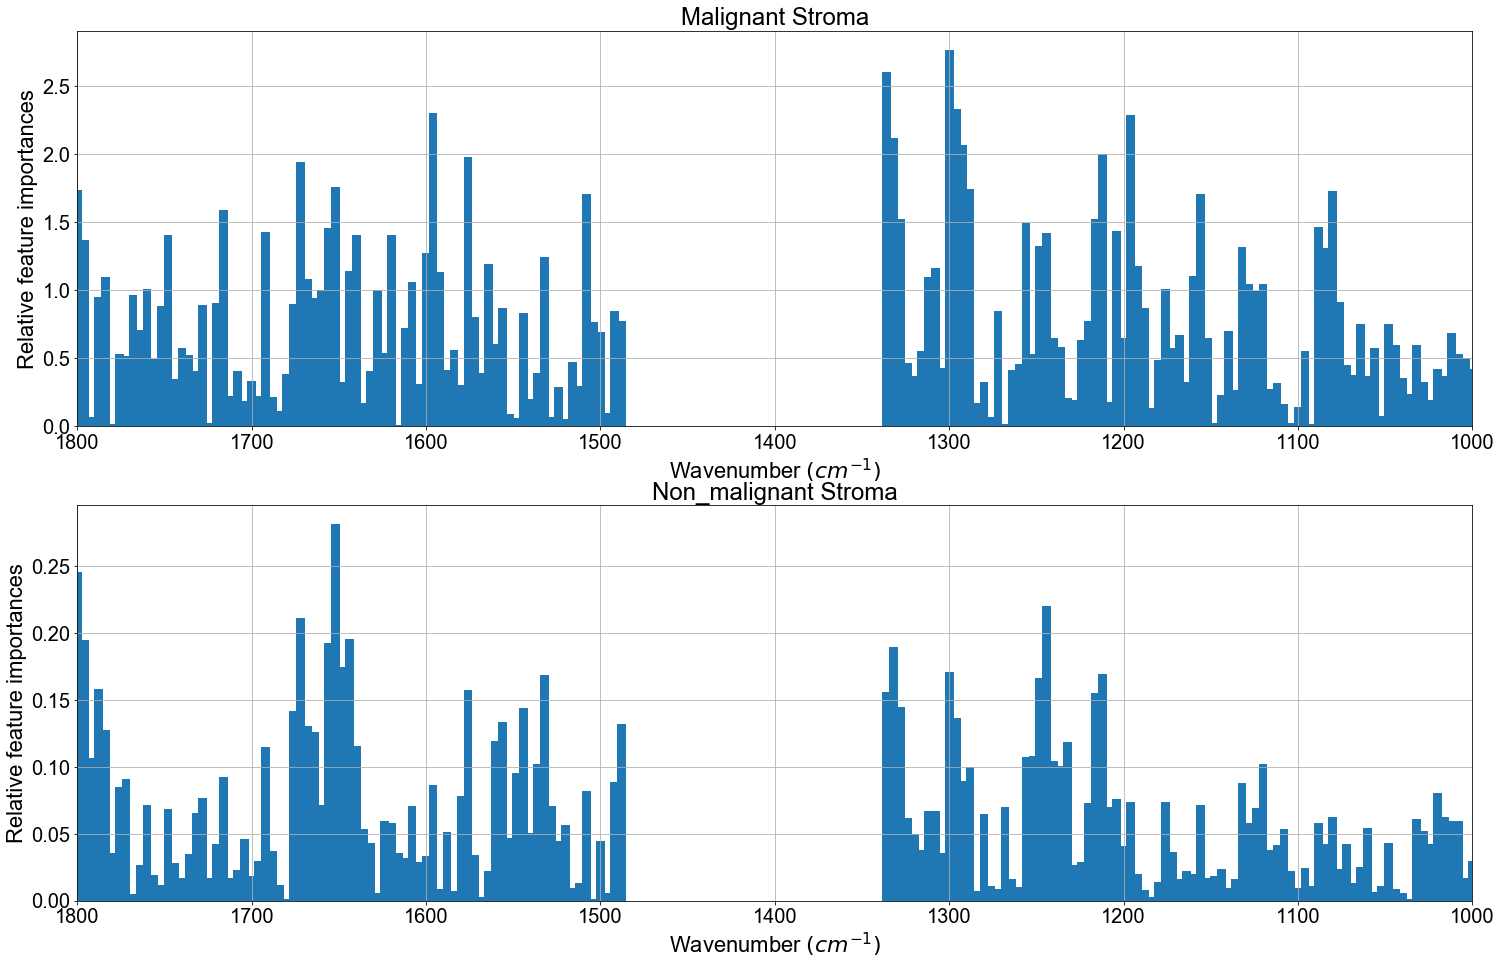

In [228]:
for clf_name in ["LR"]:
    
    fig = plot_importances(classifier_results[clf_name], n_best = None)

    fig.savefig(r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Feature_Importances_{}.svg".format(clf_name)
               ,format = "svg"
               ,bbox_inches = "tight")

This function is used to optimise the hyperparameters of XGboost

# Importing Breast Cancer data

In [123]:
from sklearn.preprocessing import normalize

def import_image(original):
    
    image = original.reshape(original.shape[-1], -1)

    return normalize(image, axis = 0, norm = "l1").reshape(original.shape)

import os
from scipy.io import loadmat

file_place = r"B:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"B:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

import os
from scipy.io import loadmat

file_place = "/mnt/hgfs/E/Breast Cancer Data/br20832_cores/br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = "/mnt/hgfs/E/Breast Cancer Data/overlay/overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

In [126]:
import os
from scipy.io import loadmat
import imageio

file_place = r"E:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"E:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

#overlays = {image_list[:-4] : imageio.imread(os.path.join(image_list_directory, image_name)) for image_name in image_list}

images = {file_name[:-4] : loadmat(os.path.join(file_place, file_name))["image"] for file_name in file_list[-20:-10]}
#images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

In [127]:
images.keys()

dict_keys(['L5', 'L6', 'L7', 'L8', 'L9', 'M1', 'M10', 'M11', 'M12', 'M13'])

# Preprocess image

In [211]:
image_ref = "L5"

image = images[image_ref]
#overlay = 

PCA_NR_Components = 5

image_dataframe = pd.DataFrame(image.reshape(-1, image.shape[-1]), columns = Breast_DF.columns)

dataframe = TAT.process_data(image_dataframe, paraffin = (1340,1490))

PCA_reduced = TAT.PCA_denoise(dataframe, PCA_NR_Components)

values = pipe.fit_transform(PCA_reduced.T).T

image_P_list = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

image_P = image_P_list.values.reshape(image.shape[0], image.shape[1], -1)

Processing


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Plotting predictions for image

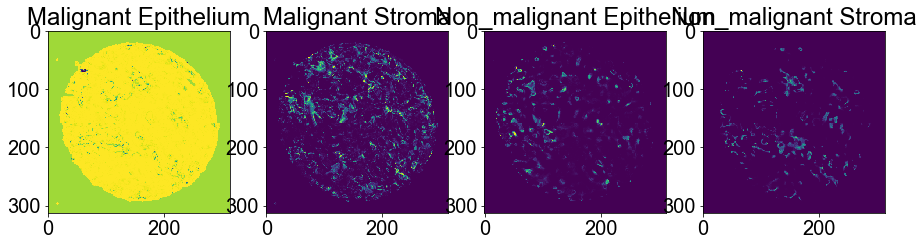

In [133]:
fig, axes = plt.subplots(ncols = len(xgbinary_classifiers), nrows = 1, figsize = (15,10))

pred_cube = individual_predictions(image_P, xgbinary_classifiers)

for ax, name, image in zip(axes.flat, pred_cube.keys(), pred_cube.values()):
    
    ax.set_title(name)
    ax.imshow(image)
    
plt.show()

In [132]:
import matplotlib as mpl

def individual_predictions(image, classifiers):
    
    Pred_cube = {name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,1].reshape(image.shape[0], image.shape[1]) for name, classifier in classifiers.items()}
    
    return Pred_cube

def prediction_plot(image, classifiers, **kwargs):
    
    # Get colours from tab10 colour list
    colours = dict(zip(classifiers.keys(), plt.get_cmap("tab10").colors))
    
    # Prediction values for each 
    Pred_DF = pd.DataFrame({name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,1] for name, classifier in classifiers.items()})

    Pred_DF["Winner_ID"] = Pred_DF.idxmax(axis = 1)
    Pred_DF["Winner_conf"] = Pred_DF.max(axis = 1)

    # RGB image
    RGB = np.array([colours[ID] for ID in Pred_DF["Winner_ID"]]).reshape(image.shape[0], image.shape[1], 3)
    
    # Confidence plot
    conf = Pred_DF["Winner_conf"].values.reshape(image.shape[0], image.shape[1], 1)
    
    # RGBA plot
    rgba = np.concatenate([RGB,conf], axis = 2)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', list(colours.values()), N = len(colours))
    
    # If a threshold is supplied, use it
    if "thresh" in kwargs.keys():
        rgba[np.abs(image_P.mean(axis = 2)) < kwargs.get("thresh")] = [0,0,0,0]
        
    fig, ax = plt.subplots()
    cax = ax.imshow(rgba, cmap = cmap)
    cbar = fig.colorbar(cax, ticks = np.linspace(0, 1, len(classifiers)))
    cbar.ax.set_yticklabels(classifiers.keys())  # horizontal colorbar
    
    return rgba, conf.reshape(conf.shape[0],conf.shape[1])

In [134]:
from skimage.filters import threshold_otsu

C:\Users\Conor\Anaconda3\lib\site-packages\skimage\__init__.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Conor\\Anaconda3\\lib\\site-packages\\pytest.py' mode='r' encoding='utf-8'>
  imp.find_module('pytest')
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


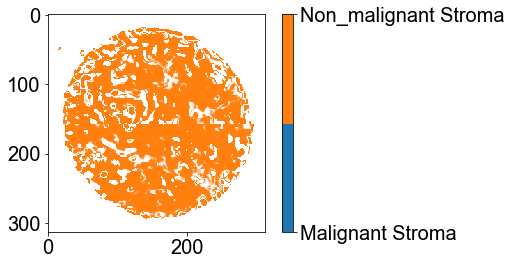

In [213]:
rgba, conf = prediction_plot(image_P, classifier_results["LDA"], thresh = threshold_otsu(image_P.mean(axis = 2)))

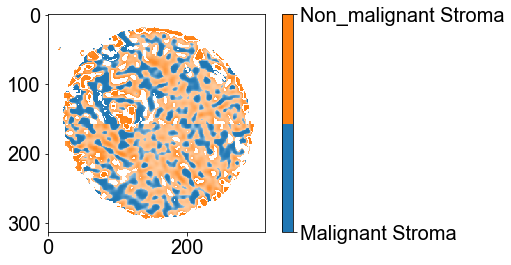

In [214]:
rgba, conf = prediction_plot(image_P, classifier_results["LR"], thresh = threshold_otsu(image_P.mean(axis = 2)))

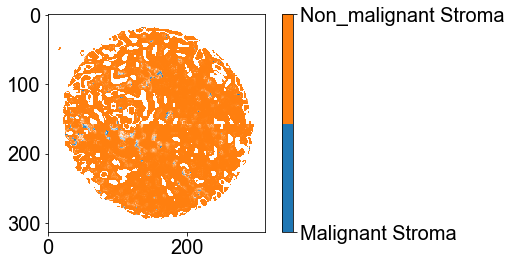

In [181]:
rgba, conf = prediction_plot(image_P, xgbinary_classifiers, thresh = threshold_otsu(image_P.mean(axis = 2)))

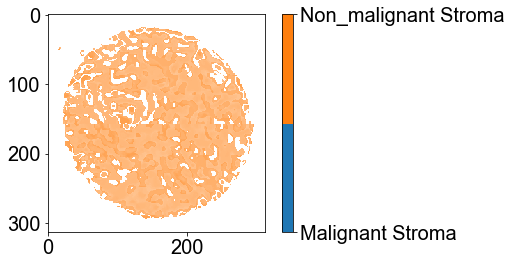

In [212]:
rgba, conf = prediction_plot(image_P, classifier_results["RF"], thresh = threshold_otsu(image_P.mean(axis = 2)))

In [324]:
DATA.shape

(111311, 164)